In [2]:
import sys
sys.path.append('../src_variable')

import road as rd
import network as nw 
import torch
import traffic_lights as tl
import junction as jn
import smoothness as sm
import generate_kvadraturen as gk
import bus
import matplotlib.pyplot as plt

### Testing smoothness of delay time for a minimal network

The network will consist of four roads with a coupled traffic light connecting them
It will also consist of two busses, with two stops each

In [5]:
def generate_minimal_bus_network(T, v1, v2, v3, v4, t1, t2):
    ids1 = ["road1", "road3"]
    ids2 = ["road2", "road4"]
    stops1 = [("road1", 40), ("road3", 30)]
    stops2 = [("road2", 45), ("road4", 35)]
    times1 = [3.0, 30.0]
    times2 = [5.0, 35.0]

    objectives = []

    if len(v1) > 1:
        assert len(v2) == 1
        assert len(v3) == 1
        assert len(v4) == 1
        assert len(t1) == 1
        assert len(t2) == 1

        for v in v1:
            road1 = rd.Road(1, 50, 5, torch.tensor([v], requires_grad=True), [], left_pos=(-1, 0), right_pos=(0, 0),
                            inflow = 0.1, id="road1")
            road2 = rd.Road(1, 50, 5, torch.tensor([v2[0]], requires_grad=True), [], left_pos=(0, 0), right_pos=(1, 0),
                            inflow = 0.1, id="road2")
            road3 = rd.Road(1, 50, 5, torch.tensor([v3[0]], requires_grad=True), [], left_pos=(0, -1), right_pos=(0, 0),
                            inflow = 0.1, id="road3")
            road4 = rd.Road(1, 50, 5, torch.tensor([v4[0]], requires_grad=True), [], left_pos=(0, 0), right_pos=(0, 1),
                            inflow = 0.1, id="road4")
            
            trafficlight = tl.CoupledTrafficLightContinuous(False, [0], [2], [1], [3], [t1[0], t2[0]])
            junction = jn.Junction([road1, road2, road3, road4], [0,1], [2,3], [[1.0, 0.0],[0.0, 1.0]], [], [trafficlight])
            network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, optimizing = False)

            bus1 = bus.Bus(ids1, stops1, times1, network)
            bus2 = bus.Bus(ids2, stops2, times2, network)
            bus_network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, [bus1, bus2],
                                         optimizing = False, store_densities = False)
            _, _, _, bus_delays = bus_network.solve_cons_law()
            obj = torch.tensor(0.0)
            for i in range(len(bus_delays)):
                for j in range(len(bus_delays[i])):
                    obj = obj +  bus_delays[i][j].detach()
            objectives.append(obj)
            
    elif len(v2) > 1:
        assert len(v1) == 1
        assert len(v3) == 1
        assert len(v4) == 1
        assert len(t1) == 1
        assert len(t2) == 1
        
        for v in v2:
            road1 = rd.Road(1, 50, 5, torch.tensor([v1[0]], requires_grad=True), [], left_pos=(-1, 0), right_pos=(0, 0),
                            inflow = 0.1, id="road1")
            road2 = rd.Road(1, 50, 5, torch.tensor([v], requires_grad=True), [], left_pos=(0, 0), right_pos=(1, 0),
                            inflow = 0.1, id="road2")
            road3 = rd.Road(1, 50, 5, torch.tensor([v3[0]], requires_grad=True), [], left_pos=(0, -1), right_pos=(0, 0),
                            inflow = 0.1, id="road3")
            road4 = rd.Road(1, 50, 5, torch.tensor([v4[0]], requires_grad=True), [], left_pos=(0, 0), right_pos=(0, 1),
                            inflow = 0.1, id="road4")
            
            trafficlight = tl.CoupledTrafficLightContinuous(False, [0], [2], [1], [3], [t1[0], t2[0]])
            junction = jn.Junction([road1, road2, road3, road4], [0,1], [2,3], [[1.0, 0.0],[0.0, 1.0]], [], [trafficlight])
            network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, optimizing = False)

            bus1 = bus.Bus(ids1, stops1, times1, network)
            bus2 = bus.Bus(ids2, stops2, times2, network)
            bus_network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, [bus1, bus2],
                                         optimizing = False, store_densities = False)
            _, _, _, bus_delays = bus_network.solve_cons_law()
            obj = torch.tensor(0.0)
            for i in range(len(bus_delays)):
                for j in range(len(bus_delays[i])):
                    obj = obj +  bus_delays[i][j].detach()
            objectives.append(obj)

    elif len(t1) > 1:
        assert len(v1) == 1
        assert len(v2) == 1
        assert len(v3) == 1
        assert len(v4) == 1
        assert len(t2) == 1
        for t in t1:
            road1 = rd.Road(1, 50, 5, torch.tensor([v1[0]], requires_grad=True), [], left_pos=(-1, 0), right_pos=(0, 0),
                            inflow = 0.1, id="road1")
            road2 = rd.Road(1, 50, 5, torch.tensor([v2[0]], requires_grad=True), [], left_pos=(0, 0), right_pos=(1, 0),
                            inflow = 0.1, id="road2")
            road3 = rd.Road(1, 50, 5, torch.tensor([v3[0]], requires_grad=True), [], left_pos=(0, -1), right_pos=(0, 0),
                            inflow = 0.1, id="road3")
            road4 = rd.Road(1, 50, 5, torch.tensor([v4[0]], requires_grad=True), [], left_pos=(0, 0), right_pos=(0, 1),
                            inflow = 0.1, id="road4")
            
            trafficlight = tl.CoupledTrafficLightContinuous(False, [0], [2], [1], [3], [t, t2[0]])
            junction = jn.Junction([road1, road2, road3, road4], [0,1], [2,3], [[1.0, 0.0],[0.0, 1.0]], [], [trafficlight])
            network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, optimizing = False)

            bus1 = bus.Bus(ids1, stops1, times1, network)
            bus2 = bus.Bus(ids2, stops2, times2, network)
            bus_network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, [bus1, bus2],
                                         optimizing = False, store_densities = False)
            _, _, _, bus_delays = bus_network.solve_cons_law()
            obj = torch.tensor(0.0)
            for i in range(len(bus_delays)):
                for j in range(len(bus_delays[i])):
                    obj = obj +  bus_delays[i][j].detach()
            objectives.append(obj)

    elif len(t2) > 1:
        assert len(v1) == 1
        assert len(v2) == 1
        assert len(v3) == 1
        assert len(v4) == 1
        assert len(t1) == 1
   
        for t in t2:
            road1 = rd.Road(1, 50, 5, torch.tensor([v1[0]], requires_grad=True), [], left_pos=(-1, 0), right_pos=(0, 0),
                            inflow = 0.1, id="road1")
            road2 = rd.Road(1, 50, 5, torch.tensor([v2[0]], requires_grad=True), [], left_pos=(0, 0), right_pos=(1, 0),
                            inflow = 0.1, id="road2")
            road3 = rd.Road(1, 50, 5, torch.tensor([v3[0]], requires_grad=True), [], left_pos=(0, -1), right_pos=(0, 0),
                            inflow = 0.1, id="road3")
            road4 = rd.Road(1, 50, 5, torch.tensor([v4[0]], requires_grad=True), [], left_pos=(0, 0), right_pos=(0, 1),
                            inflow = 0.1, id="road4")
            
            trafficlight = tl.CoupledTrafficLightContinuous(False, [0], [2], [1], [3], [t1[0], t])
            junction = jn.Junction([road1, road2, road3, road4], [0,1], [2,3], [[1.0, 0.0],[0.0, 1.0]], [], [trafficlight])
            network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, optimizing = False)

            bus1 = bus.Bus(ids1, stops1, times1, network)
            bus2 = bus.Bus(ids2, stops2, times2, network)
            bus_network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, [bus1, bus2],
                                         optimizing = False, store_densities = False)
            _, _, _, bus_delays = bus_network.solve_cons_law()
            obj = torch.tensor(0.0)
            for i in range(len(bus_delays)):
                for j in range(len(bus_delays[i])):
                    obj = obj +  bus_delays[i][j].detach()
            objectives.append(obj)
    
    elif len(v3) > 1:
        assert len(v1) == 1
        assert len(v2) == 1
        assert len(v4) == 1
        assert len(t1) == 1
        assert len(t2) == 1
        for v in v3:
            road1 = rd.Road(1, 50, 5, torch.tensor([v1[0]], requires_grad=True), [], left_pos=(-1, 0), right_pos=(0, 0),
                            inflow = 0.1, id="road1")
            road2 = rd.Road(1, 50, 5, torch.tensor([v2[0]], requires_grad=True), [], left_pos=(0, 0), right_pos=(1, 0),
                            inflow = 0.1, id="road2")
            road3 = rd.Road(1, 50, 5, torch.tensor([v], requires_grad=True), [], left_pos=(0, -1), right_pos=(0, 0),
                            inflow = 0.1, id="road3")
            road4 = rd.Road(1, 50, 5, torch.tensor([v3[0]], requires_grad=True), [], left_pos=(0, 0), right_pos=(0, 1),
                            inflow = 0.1, id="road4")
            
            trafficlight = tl.CoupledTrafficLightContinuous(False, [0], [2], [1], [3], [t1[0], t2[0]])
            junction = jn.Junction([road1, road2, road3, road4], [0,1], [2,3], [[1.0, 0.0],[0.0, 1.0]], [], [trafficlight])
            network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, optimizing = False)

            bus1 = bus.Bus(ids1, stops1, times1, network)
            bus2 = bus.Bus(ids2, stops2, times2, network)
            bus_network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, [bus1, bus2],
                                         optimizing = False, store_densities = False)
            _, _, _, bus_delays = bus_network.solve_cons_law()
            obj = torch.tensor(0.0)
            for i in range(len(bus_delays)):
                for j in range(len(bus_delays[i])):
                    obj = obj +  bus_delays[i][j].detach()
            objectives.append(obj)

    else:
        assert len(v1) == 1
        assert len(v2) == 1
        assert len(v3) == 1
        assert len(t1) == 1
        assert len(t2) == 1

        for v in v4:
            road1 = rd.Road(1, 50, 5, torch.tensor([v1[0]], requires_grad=True), [], left_pos=(-1, 0), right_pos=(0, 0),
                            inflow = 0.1, id="road1")
            road2 = rd.Road(1, 50, 5, torch.tensor([v2[0]], requires_grad=True), [], left_pos=(0, 0), right_pos=(1, 0),
                            inflow = 0.1, id="road2")
            road3 = rd.Road(1, 50, 5, torch.tensor([v3[0]], requires_grad=True), [], left_pos=(0, -1), right_pos=(0, 0),
                            inflow = 0.1, id="road3")
            road4 = rd.Road(1, 50, 5, torch.tensor([v], requires_grad=True), [], left_pos=(0, 0), right_pos=(0, 1),
                            inflow = 0.1, id="road4")
            
            trafficlight = tl.CoupledTrafficLightContinuous(False, [0], [2], [1], [3], [t1[0], t2[0]])
            junction = jn.Junction([road1, road2, road3, road4], [0,1], [2,3], [[1.0, 0.0],[0.0, 1.0]], [], [trafficlight])
            network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, optimizing = False)

            bus1 = bus.Bus(ids1, stops1, times1, network)
            bus2 = bus.Bus(ids2, stops2, times2, network)
            bus_network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, [bus1, bus2],
                                         optimizing = False, store_densities = False)
            _, _, _, bus_delays = bus_network.solve_cons_law()
            obj = torch.tensor(0.0)
            for i in range(len(bus_delays)):
                for j in range(len(bus_delays[i])):
                    obj = obj +  bus_delays[i][j].detach()
            objectives.append(obj)

    return objectives
            


In [8]:
# Testing smooothness wrt speed limits of roads
T = 150

variable_speeds = [float(i) for i in range(30, 60)]
fixed_speed = [50.0]
fixed_t1 = [50.0]
fixed_t2 = [50.0]

objectives = generate_minimal_bus_network(T, variable_speeds, fixed_speed, fixed_speed, fixed_speed, fixed_t1, fixed_t2)

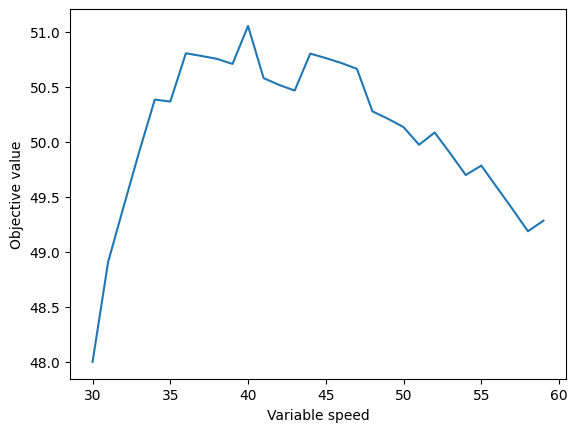

In [11]:
plt.plot(variable_speeds, objectives)
plt.xlabel('Variable speed')
plt.ylabel('Objective value')
plt.show()

In [12]:
objectives2 = generate_minimal_bus_network(T, fixed_speed, variable_speeds, fixed_speed, fixed_speed, fixed_t1, fixed_t2)

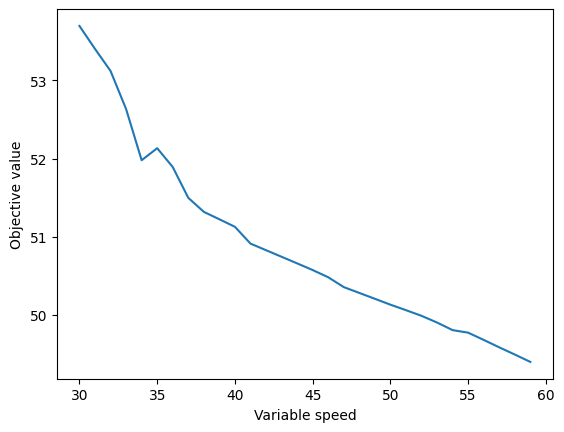

In [24]:
plt.plot(variable_speeds, objectives2)
plt.xlabel('Variable speed')
plt.ylabel('Objective value')
plt.show()

In [14]:
objectives_3 = generate_minimal_bus_network(T, fixed_speed, fixed_speed, variable_speeds, fixed_speed, fixed_t1, fixed_t2)

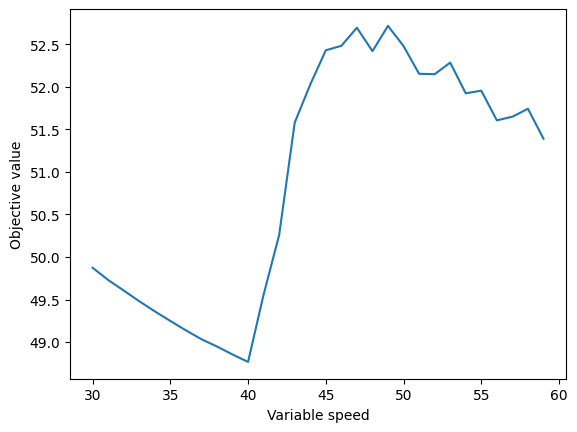

In [23]:
plt.plot(variable_speeds, objectives_3)
plt.xlabel('Variable speed')
plt.ylabel('Objective value')
plt.show()


In [16]:
objectives_4 = generate_minimal_bus_network(T, fixed_speed, fixed_speed, fixed_speed, variable_speeds, fixed_t1, fixed_t2)

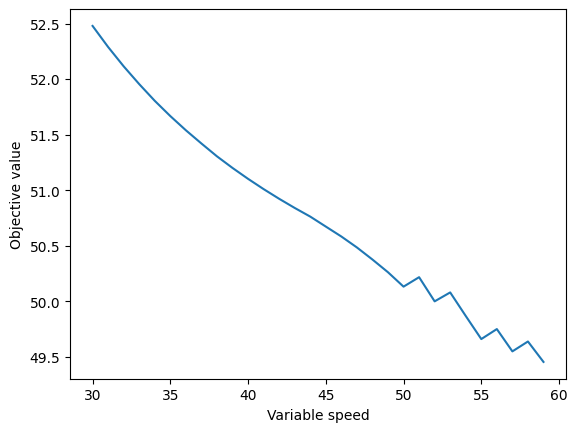

In [22]:
plt.plot(variable_speeds, objectives_4)
plt.xlabel('Variable speed')
plt.ylabel('Objective value')
plt.show()

In [18]:
# Testing smoothness wrt traffic light times
variable_t1 = [float(i) for i in range(30, 60)]
objectives_5 = generate_minimal_bus_network(T, fixed_speed, fixed_speed, fixed_speed, fixed_speed, variable_t1, fixed_t2)

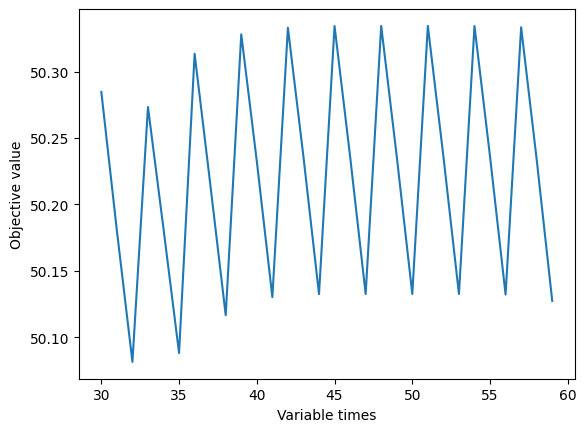

In [19]:
plt.plot(variable_t1, objectives_5)
plt.xlabel('Variable times')
plt.ylabel('Objective value')
plt.show()

In [20]:
# Testing smoothness wrt traffic light times
variable_t2 = [float(i) for i in range(30, 60)]
objectives_6 = generate_minimal_bus_network(T, fixed_speed, fixed_speed, fixed_speed, fixed_speed, fixed_t1, variable_t2)

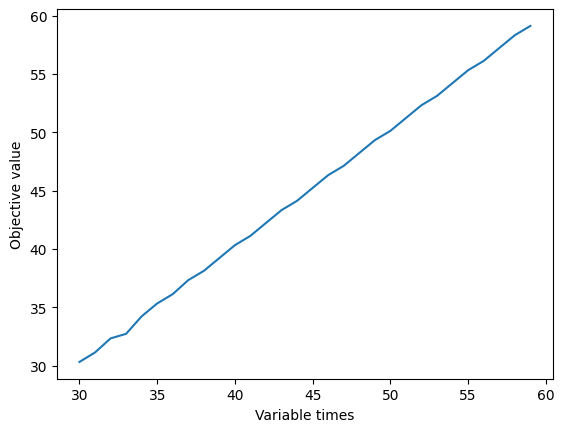

In [21]:
plt.plot(variable_t2, objectives_6)
plt.xlabel('Variable times')
plt.ylabel('Objective value')
plt.show()